## Домашнее задание к лекции «Корреляция и корреляционный анализ»

    Возьмите датасет Mortality and Water Hardness**
    https://www.kaggle.com/ukveteran/mortality-and-water-hardness

    В этом датасете содержатся данные по средней годовой смертности на
    100000 населения и концентрации кальция в питьевой воде для 61
    большого города в Англии и Уэльсе. Города дополнительно поделены на
    северные и южные.

### Задание 1.
#### Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

    Построить точечный график
    Рассчитать коэффициенты корреляции Пирсона и Спирмена
    Построить модель линейной регрессии
    Рассчитать коэффициент детерминации
    Вывести график остатков

### Задание 2.
#### Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
water = pd.read_csv("https://raw.githubusercontent.com/IlerioDef/educational_data/main/Water")
water.drop("Unnamed: 0", axis=1, inplace=True) #удаляем ненужный индекс
water_south = water[water["location"]=="South"] #Заранее разделяем датафрейм на Юг
water_north = water[water["location"]=="North"] #и Север, для задания 2
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


##### 1-1 Для всего датафрейма

(           mortality  hardness
 mortality   1.000000 -0.654849
 hardness   -0.654849  1.000000,
            mortality  hardness
 mortality   1.000000 -0.631665
 hardness   -0.631665  1.000000)

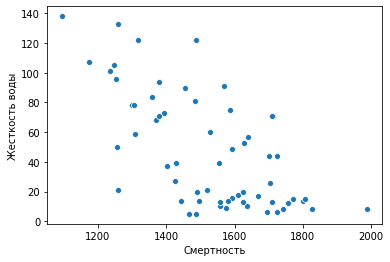

In [3]:
#Построим точечный график для всего датафрейма
sns.scatterplot(water['mortality'],
                water['hardness']
               ).set(xlabel='Смертность',
                     ylabel='Жесткость воды')
##Связь выглядит обратной, линейной и слабовыраженной, если имеется вовсе.  
#рассчитаем коэффициент Пирсона
water_pearson = water.corr(method='pearson')
# рассчитаем коэффициент Спирмена
water_spearman = water.corr(method='spearman')
water_pearson, water_spearman


In [4]:
#сделаем заготовки для модели. Мы хотим выяснить, зависит ли смертность от жесткости воды. Поэтому У = смертность
X = water[['hardness']]
y = water['mortality']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape,y_train.shape


((48, 1), (48,))

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
model.coef_, model.intercept_
#y = -3.2 * x + 1679.9

(array([-3.28281845]), 1683.9212680875548)

In [8]:
y_pred = model.predict(X_test)
y_pred

array([1339.22533049, 1651.09308355, 1637.96180974, 1539.47725614,
       1427.86142873, 1618.26489902, 1247.30641379, 1437.70988409,
       1614.98208057, 1664.22435737, 1490.23497934, 1418.01297337,
       1555.89134841])

In [9]:
model.score(X_test, y_test) #коэффициент детерминации

0.5099679408034544

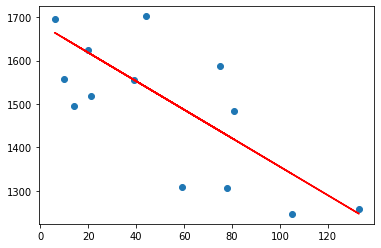

In [10]:
plt.scatter(X_test, y_test) # график отстатков
plt.plot(X_test, y_pred, c='r')
plt.show()

### 1-2 Для Севера.

[Text(0, 0.5, 'Жесткость воды'), Text(0.5, 0, 'Смертность')]

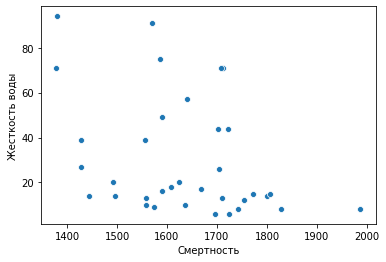

In [11]:
#Построим точечный график для всего датафрейма
sns.scatterplot(water_north['mortality'],
                water_north['hardness']
               ).set(xlabel='Смертность',
                     ylabel='Жесткость воды')
##Связь выглядит отсутствующей.  

In [12]:
##Связь выглядит обратной, линейной и слабовыраженной, если имеется вовсе.  
#рассчитаем коэффициент Пирсона
water_north_pearson = water_north.corr(method='pearson')
# рассчитаем коэффициент Спирмена
water_north_spearman = water_north.corr(method='spearman')
water_north_pearson, water_north_spearman

(           mortality  hardness
 mortality   1.000000 -0.368598
 hardness   -0.368598  1.000000,
            mortality  hardness
 mortality   1.000000 -0.404208
 hardness   -0.404208  1.000000)

In [13]:
#сделаем заготовки для модели. Мы хотим выяснить, зависит ли смертность от жесткости воды. Поэтому У = смертность
X1 = water_north[['hardness']]
y1 = water_north['mortality']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)
X1_train.shape,y1_train.shape
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
model1.coef_, model1.intercept_
#y = -2.25 * x + 1694.91


(array([-2.25038888]), 1694.905301402942)

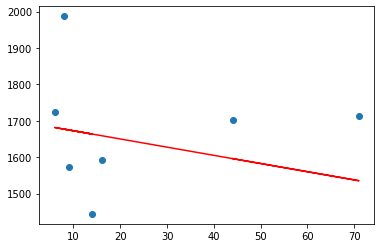

In [14]:
y1_pred = model1.predict(X1_test)
y1_pred
model1.score(X1_test, y1_test) #коэффициент детерминации
plt.scatter(X1_test, y1_test) # график отстатков
plt.plot(X1_test, y1_pred, c='r')
plt.show()

### 1-3 Для Юга

[Text(0, 0.5, 'Жесткость воды'), Text(0.5, 0, 'Смертность')]

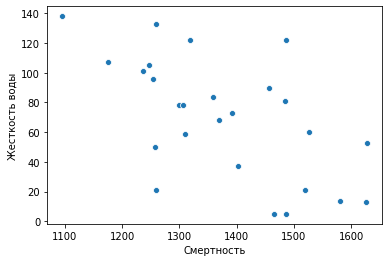

In [18]:
#Построим точечный график для всего датафрейма
sns.scatterplot(water_south['mortality'],
                water_south['hardness']
               ).set(xlabel='Смертность',
                     ylabel='Жесткость воды')
##Связь выглядит отсутствующей.  

In [19]:
##Связь выглядит обратной, линейной и слабовыраженной, если имеется вовсе.  
#рассчитаем коэффициент Пирсона
water_south_pearson = water_south.corr(method='pearson')
# рассчитаем коэффициент Спирмена
water_south_spearman = water_south.corr(method='spearman')
water_south_pearson, water_south_spearman

(           mortality  hardness
 mortality   1.000000 -0.602153
 hardness   -0.602153  1.000000,
            mortality  hardness
 mortality   1.000000 -0.595723
 hardness   -0.595723  1.000000)

In [21]:
#сделаем заготовки для модели. Мы хотим выяснить, зависит ли смертность от жесткости воды. Поэтому У = смертность
X2 = water_south[['hardness']]
y2 = water_south['mortality']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)
X2_train.shape,y2_train.shape
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
model2.coef_, model2.intercept_
#y = -3.07 * x + 1595.43


(array([-3.07466127]), 1595.4337548999538)

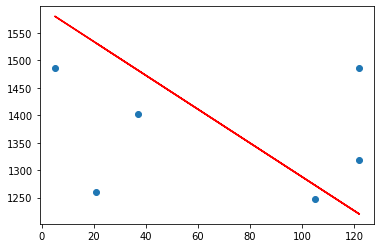

In [22]:
y2_pred = model2.predict(X2_test)
y2_pred
model2.score(X2_test, y2_test) #коэффициент детерминации
plt.scatter(X2_test, y2_test) # график отстатков
plt.plot(X2_test, y2_pred, c='r')
plt.show()

#### Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?
Если верить коэффицентам, то имеется умеренная обратна связь,т.к. коэффициент корреляции находится в пределах 0.3 -0.7

#### Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
сохраняется. Более того, в случае южных регионов,- эта связь яввляется более выраженной,нежели для северных. 
